In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv("creditcard.csv")[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [3]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

171

In [4]:
lr = LogisticRegression()
??lr.score

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace (1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)}, 
    refit = 'precision',
    return_train_score=True,
    cv = 10,
    n_jobs = -1
)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [6]:
grid.cv_results_

{'mean_fit_time': array([2.25329273, 2.27790389, 2.23323812, 2.2865097 , 1.9832376 ,
        2.22665834, 2.36122005, 2.27303507, 2.24202998, 2.48400667,
        2.2269479 , 2.22037094, 2.10040367, 2.22826748, 2.11302211,
        2.09930232, 2.14891469, 2.12790356, 2.25552044, 2.31666498,
        2.17687933, 2.24095075, 2.10560982, 2.59087341, 2.6941654 ,
        2.02329884, 2.23499794, 2.26342983, 2.10263088, 2.06769166]),
 'std_fit_time': array([0.25929585, 0.35856549, 0.19149527, 0.23718132, 0.26369522,
        0.29752443, 0.26942522, 0.31151026, 0.23015105, 0.50261382,
        0.27150304, 0.24688955, 0.26183174, 0.39149623, 0.31174542,
        0.33649426, 0.13332707, 0.20527122, 0.24954662, 0.24994735,
        0.26600773, 0.23068892, 0.16477237, 0.63567697, 0.30741828,
        0.27220509, 0.32796546, 0.29052956, 0.22049774, 0.22374875]),
 'mean_score_time': array([0.02273827, 0.02473357, 0.0197484 , 0.01874771, 0.02683058,
        0.02054586, 0.02978001, 0.02608986, 0.02623303, 0.02

In [7]:
from sklearn.metrics import precision_score, recall_score

precision_score(y, grid.predict(X))

0.7878787878787878

In [8]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,split5_train_recall_score,split6_train_recall_score,split7_train_recall_score,split8_train_recall_score,split9_train_recall_score,mean_train_recall_score,std_train_recall_score
0,2.253293,0.259296,0.022738,0.008390,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,2.277904,0.358565,0.024734,0.008519,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.463415,0.583333,1.000000,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,2.233238,0.191495,0.019748,0.006477,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.463415,0.583333,1.000000,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,2.286510,0.237181,0.018748,0.003084,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.452381,0.583333,1.000000,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,1.983238,0.263695,0.026831,0.008147,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.452381,0.583333,1.000000,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959
5,2.226658,0.297524,0.020546,0.004115,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.452381,0.583333,1.000000,...,0.841808,0.768362,0.778409,0.789773,0.772727,0.789773,0.795455,0.772727,0.792485,0.029289
6,2.361220,0.269425,0.029780,0.011852,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.802260,0.789773,0.818182,0.801136,0.801136,0.818182,0.789773,0.812327,0.021063
7,2.273035,0.311510,0.026090,0.007881,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.813559,0.829545,0.829545,0.812500,0.806818,0.835227,0.818182,0.827080,0.017190
8,2.242030,0.230151,0.026233,0.011681,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.944444,0.452381,0.583333,0.947368,...,0.847458,0.824859,0.846591,0.835227,0.823864,0.829545,0.857955,0.829545,0.838431,0.013974
9,2.484007,0.502614,0.026928,0.012133,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.452381,0.583333,0.947368,...,0.853107,0.830508,0.846591,0.835227,0.829545,0.835227,0.863636,0.846591,0.844665,0.012015


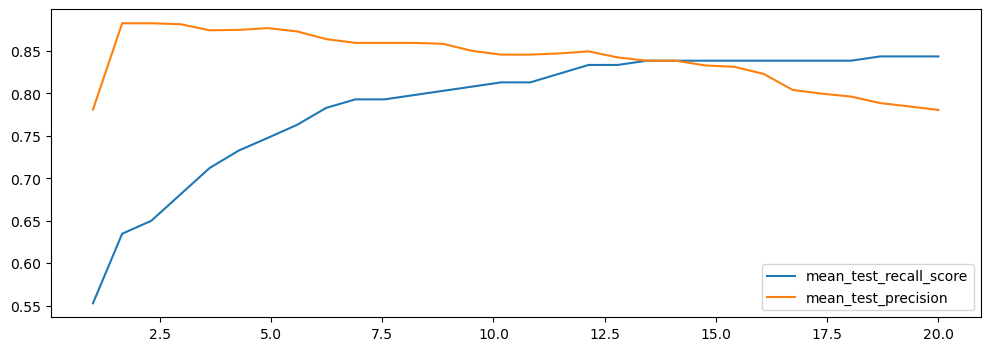

In [23]:
plt.figure(figsize=(12, 4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']], 
             df[score], 
             label=score)
plt.legend();

In [ ]:
#Below code was used to find whether there was even a mean_test_recall column. I found that it was not even there in the first case which was giving a key error message.
#fixed it by just using the mean_test_recall_score

In [22]:
plt.figure(figsize=(12, 4))
df = pd.DataFrame(grid.cv_results_)

# Print the column names to check for correctness
print(df.columns)

for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']], 
             df[score], 
             label=score)
plt.legend()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_class_weight', 'params', 'split0_test_precision',
       'split1_test_precision', 'split2_test_precision',
       'split3_test_precision', 'split4_test_precision',
       'split5_test_precision', 'split6_test_precision',
       'split7_test_precision', 'split8_test_precision',
       'split9_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_train_precision',
       'split1_train_precision', 'split2_train_precision',
       'split3_train_precision', 'split4_train_precision',
       'split5_train_precision', 'split6_train_precision',
       'split7_train_precision', 'split8_train_precision',
       'split9_train_precision', 'mean_train_precision', 'std_train_precision',
       'split0_test_recall_score', 'split1_test_recall_score',
       'split2_test_recall_score', 'split3_test_recall_score',
       'split4_test_recall_score', 'split5_test_recall_s

KeyError: 'mean_test_recall'

<Figure size 1200x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 4))
df = pd.DataFrame(grid.cv_results_)

for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df['param_class_weight']],
               y=df[score.replace('test', 'train')],
               )